In [1]:
### start by grabbing the data from pandas / whatever. Run PCA and try to come up 
# with some good clusters.

#!ls

#grab the data and analyze it.
        

Portfolio_Rec.ipynb              mlinb_ps3_Q3
bstorm_portfolio_rec.txt         pset3_Problem_3.ipynb
ifactor_stock_returns_weekly.csv


In [151]:
import csv
import numpy as np
import pandas as pd

#f = open('ifactor_stock_returns_weekly.csv')
#ftxt = f.read()
#frows = ftxt.split('\n')
#print(frows[:2])

stocks_df = pd.read_csv('ifactor_stock_returns_daily_mkt.csv')
print(stocks_df.head())
    

         Date         A        AA      AAME       AAN      AAON       AAP  \
0  2010-01-05 -0.010863 -0.031231  0.060606  0.009062 -0.029015 -0.005943   
1  2010-01-06 -0.003553  0.052077  0.000000  0.000000 -0.039670  0.008719   
2  2010-01-07 -0.001297 -0.021214 -0.057143  0.008083  0.037017 -0.000247   
3  2010-01-08 -0.000324  0.024684  0.053030 -0.006681  0.011898  0.003953   
4  2010-01-11  0.000649  0.025264  0.043166  0.015695  0.027096 -0.009843   

   AAT      AAPL      AAWW  ...      ZBRA      ZEUS      ZION      ZIOP  \
0  NaN  0.001729  0.055236  ... -0.001744 -0.006500  0.035259  0.033898   
1  NaN -0.015906 -0.041677  ... -0.007687  0.039251  0.086957  0.009836   
2  NaN -0.001849  0.008284  ... -0.025000 -0.012876  0.112000 -0.012987   
3  NaN  0.006648  0.008216  ... -0.003250  0.031305 -0.016187  0.019737   
4  NaN -0.008821  0.003056  ...  0.003261 -0.027544  0.006094  0.029032   

       ZIXI        ZN  ZNGA      ZOLT      ZUMZ        SP  
0 -0.044944 -0.015278   Na

In [163]:
#do this for daily returns

stocks_df_5yr = stocks_df[1511:]

stocks_df_5yr = stocks_df_5yr.reset_index(drop=True)
print(stocks_df_5yr.head())

'''(1+stocks_df_5yr).cumprod()
st_5yr_cp.cumprod()'''

         Date         A        AA      AAME       AAN      AAON       AAP  \
0  2016-01-06  0.004439 -0.071197  0.028446 -0.075692 -0.018552 -0.026455   
1  2016-01-07 -0.042475 -0.039489 -0.025532 -0.032756 -0.022130  0.011073   
2  2016-01-08 -0.010513 -0.024184 -0.026201 -0.016449 -0.032532 -0.021971   
3  2016-01-11 -0.016844 -0.008674 -0.044843  0.010821  0.006823  0.010236   
4  2016-01-12  0.006589 -0.090000  0.004695  0.104623 -0.005808  0.006936   

        AAT      AAPL      AAWW  ...      ZBRA      ZEUS      ZION      ZIOP  \
0 -0.001032 -0.019570 -0.018337  ... -0.039957  0.000000 -0.029145 -0.087719   
1 -0.021431 -0.042205 -0.080860  ... -0.045316 -0.057461 -0.030020 -0.023352   
2 -0.008971  0.005288 -0.019766  ... -0.002693 -0.032757 -0.011254 -0.015471   
3  0.006656  0.016192 -0.041749  ... -0.006582 -0.089370 -0.019919 -0.098571   
4 -0.007405  0.014514  0.018376  ...  0.016820 -0.007232 -0.004148 -0.006339   

       ZIXI        ZN      ZNGA  ZOLT      ZUMZ        S

'(1+stocks_df_5yr).cumprod()\nst_5yr_cp.cumprod()'

In [167]:
stocks_ser = stocks_df_5yr.isnull().sum()
stocks_ser_nonnulls = stocks_ser[stocks_ser <= 20]

nnullkeys = stocks_ser_nonnulls.keys()
print(nnullkeys)

nnull_stocks_df = stocks_df_5yr[nnullkeys]

print(nnull_stocks_df)

#convert NaN's to 0.
#"X" should be ready for pca
X = nnull_stocks_df.iloc[:,1:-1]
X = X.fillna(0)

#subtract market exposure [skip]
#sp = nnull_stocks_df['SP']
#for i in X.columns:
#    X[i] = X[i]-sp
#X = X-sp

#put column names into a var for later use.
colnames = list(X.columns)

print(X.head())
#print(type(X.iloc[1,1]))

#take cumulative product - creates bigger difference in PCA

Index(['Date', 'A', 'AA', 'AAME', 'AAN', 'AAON', 'AAP', 'AAT', 'AAPL', 'AAWW',
       ...
       'ZAZA', 'ZBRA', 'ZEUS', 'ZION', 'ZIOP', 'ZIXI', 'ZN', 'ZNGA', 'ZUMZ',
       'SP'],
      dtype='object', length=2147)
            Date         A        AA      AAME       AAN      AAON       AAP  \
0     2016-01-06  0.004439 -0.071197  0.028446 -0.075692 -0.018552 -0.026455   
1     2016-01-07 -0.042475 -0.039489 -0.025532 -0.032756 -0.022130  0.011073   
2     2016-01-08 -0.010513 -0.024184 -0.026201 -0.016449 -0.032532 -0.021971   
3     2016-01-11 -0.016844 -0.008674 -0.044843  0.010821  0.006823  0.010236   
4     2016-01-12  0.006589 -0.090000  0.004695  0.104623 -0.005808  0.006936   
5     2016-01-13 -0.034826 -0.020604  0.025701 -0.086344 -0.027264 -0.039913   
6     2016-01-14  0.020347  0.015428  0.006834  0.013501  0.000000 -0.005909   
7     2016-01-15 -0.013294 -0.046961  0.006787  0.065176 -0.007507  0.021016   
8     2016-01-19  0.002425 -0.023188  0.035955  0.003573 -0.0171

In [168]:
#cumprod

X_cp = (1+X).cumprod()

print(X_cp.tail())

X = X_cp

             A        AA      AAME       AAN      AAON       AAP       AAT  \
999   2.179559  0.982469  0.423287  2.546768  2.324320  1.069287  1.281088   
1000  2.183391  0.976551  0.425526  2.493783  2.328987  1.060630  1.287103   
1001  2.182625  0.982469  0.414328  2.466634  2.324787  1.054503  1.295982   
1002  2.173919  0.971543  0.430006  2.490280  2.304717  1.059631  1.303142   
1003  2.184417  0.979282  0.441204  2.500789  2.306117  1.066557  1.314598   

          AAPL      AAWW       ABC  ...      ZAGG     ZAZA      ZBRA  \
999   2.961773  0.688772  0.887016  ...  0.742938  0.00099  3.923635   
1000  3.020536  0.695303  0.883174  ...  0.743879  0.00099  3.925023   
1001  3.019389  0.674956  0.881720  ...  0.723164  0.00099  3.949398   
1002  3.037310  0.667671  0.868532  ...  0.744821  0.00099  3.920241   
1003  3.059502  0.692540  0.882862  ...  0.763653  0.00099  3.940759   

          ZEUS      ZION      ZIOP      ZIXI        ZN      ZNGA      ZUMZ  
999   1.567672  2.086

In [187]:
X.shape

(1004, 2145)

In [169]:
#Debug: make sure no null's left in X!

nullsums = X.isnull().sum()
print(nullsums[nullsums >0])
#print(nullsums)


Series([], dtype: int64)


In [210]:
### let's run pca

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#scale first
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

pca = PCA(n_components=5)
Xpca = pca.fit_transform(scaled_x)
print(Xpca.shape)
print(Xpca)

(1004, 5)
[[ 57.71970492  19.97706038  14.36182462 -14.78142302  -2.44326722]
 [ 59.18462007  22.21686284  15.26332672 -15.92191882  -0.67895403]
 [ 59.89513082  23.31355165  15.71082557 -16.29953874   0.5480746 ]
 ...
 [-52.73962803  22.68789536 -21.25311423  -1.13301269 -18.48132282]
 [-52.57048972  22.77851982 -21.18298858  -0.99431892 -18.48293562]
 [-52.79909462  22.5235882  -21.29527205  -0.92948484 -18.71295606]]


In [211]:
## PCA descriptive stats.

#print the variance ratio
print("explained variance: ", pca.explained_variance_ratio_)

#print the singular values
print("singular values: ", pca.singular_values_)

#print pca components and their shape:
print(pca.components_.shape)

#maybe plot explained variance? [filter out the first pc]
#Xpca= Xpca[:,1:]


explained variance:  [0.48753289 0.1872592  0.07927921 0.04877565 0.03629214]
singular values:  [1023.94953001  634.59722174  412.91079207  323.87552868  279.37199954]
(5, 2145)


# Exploration of Eigenportfolios with PCA

In [213]:
#first, print out the principal components.
print(pca.components_)
print(pca.components_.shape)

[[-0.02953465 -0.00751931  0.02740292 ...  0.00460156 -0.02724198
  -0.02117156]
 [ 0.00032401 -0.04503055 -0.01192242 ... -0.03609907  0.0175429
   0.01305233]
 [-0.00367852  0.01710786 -0.00464316 ...  0.01535145 -0.01519419
   0.00577973]
 [-0.01114135 -0.01456813 -0.008893   ... -0.03859569 -0.00843629
   0.01738818]
 [ 0.01165055 -0.00319033  0.0051213  ... -0.01048852 -0.00027632
  -0.05181046]]
(5, 2145)


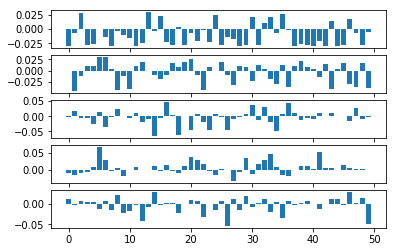

In [215]:
#display the components graphically in terms of which stocks are most prominent.
import matplotlib.pyplot as plt

#create bar graphs for each pc.
#x: sequence of coords of each bar.
#y: bar heights.

xb = np.arange(50)
ys = pca.components_[:, 0:50]

plt.figure(1)
for i in np.arange(5):
    plt.subplot(510 + i + 1)
    plt.bar(xb, ys[i])
plt.show()

## as we can see, each of the "eigenportfolios" has very different signatures, which is good.

In [223]:
#want to inspect & create cutoffs.
c1 = pca.components_[0]
print("max: ", max(c1), "min: ", min(c1))

#find # correlations greater than half of max, or less than half of min.
c1sig_pos = c1[c1>0.015]
c1sig_neg = c1[c1<-0.015]
print(len(c1sig_pos))
print(len(c1sig_neg))


##=== repeat analysis for c2/c3
print('-----------------')
c3 = pca.components_[2]
print("max: ", max(c3), "min: ", min(c3))

csig_pos = c3[c3>0.031]
csig_neg = c3[c3<-0.034]
print(len(csig_pos))
print(len(csig_neg))

'''
    thoughts: 
    - positive and negative for each factor should be different cliques
        - next step: create the cliques.
        - use the clique to suggest diverse portfolios.
        
    ** question: how to use this to judge stocks outside the ones we analyzed?
        - maybe we need to analyze levels of covariance with each of the eigen-portfolios? This will have to be an approximate measure...
    
    
'''

max:  0.030222700903650736 min:  -0.03038746937748311
354
1203
-----------------
max:  0.06189632204475761 min:  -0.06670671415493537
144
154


In [244]:
#let's first create 10 different eigen-portfolios. Sort them by size.
# (doesn't it make sense to separate pos & neg correlated stocks?)
epfs = []
epfs_inv = []

for i in range(len(pca.components_)):
    #want to inspect & create cutoffs.
    ci = pca.components_[i]
    
    #debug
    #print(len(ci))
    
    maxi = max(ci)
    mini = min(ci)
    print("max: ", max(ci), "min: ", min(ci))

    #find # correlations greater than half of max, or less than half of min.
    csig_pos = np.arange(len(ci))[ci > maxi/2]
    csig_neg = np.arange(len(ci))[ci < mini/2]
    print("significance lengths")
    print(len(csig_pos))
    print(len(csig_neg))
    
    #create lists of tickers.
    csig = csig_pos if len(csig_pos) >= len(csig_neg) else csig_neg
    csig_inv = csig_neg if len(csig_pos) >= len(csig_neg) else csig_pos
    ptiks = [colnames[i] for i in csig]
    ptiks_inv = [colnames[i] for i in csig_inv]
    
    epfs.append(ptiks)
    epfs_inv.append(ptiks_inv)

max:  0.030222700903650736 min:  -0.03038746937748311
significance lengths
352
1199
max:  0.042796785191005465 min:  -0.046256494849043955
significance lengths
150
590
max:  0.06189632204475761 min:  -0.06670671415493537
significance lengths
146
162
max:  0.08277807718383437 min:  -0.06950417970527321
significance lengths
109
70
max:  0.08447400336697206 min:  -0.08522956338859415
significance lengths
35
87


In [252]:
print(len(epfs[1]))
print(epfs[1])


590
['AA', 'AAWW', 'ABCB', 'ACCO', 'ACLS', 'ACU', 'ACY', 'ADS', 'ADTN', 'AE', 'AEGN', 'AEHR', 'AEIS', 'AFH', 'AGX', 'AHC', 'AHPI', 'AHT', 'AI', 'AIG', 'AIMC', 'AIT', 'AKRX', 'AKS', 'ALB', 'ALKS', 'ALEX', 'ALSK', 'ALV', 'AMG', 'AMKR', 'AMRB', 'AMS', 'AMWD', 'ANDE', 'ANH', 'AOS', 'AOSL', 'AP', 'APA', 'APOG', 'ARCW', 'ARKR', 'ARR', 'ARTW', 'ARTX', 'ARW', 'ASTE', 'ASUR', 'ASYS', 'ATLO', 'ATVI', 'AVEO', 'AVNW', 'AWRE', 'AXAS', 'AXDX', 'AXE', 'AXL', 'AXR', 'AXTI', 'B', 'BANC', 'BBGI', 'BBX', 'BC', 'BCC', 'BDGE', 'BDN', 'BECN', 'BELFA', 'BELFB', 'BEN', 'BERY', 'BFIN', 'BG', 'BGCP', 'BGG', 'BH', 'BHB', 'BIG', 'BIIB', 'BKU', 'BLKB', 'BMTC', 'BOKF', 'BPFH', 'BOX', 'BREW', 'BRN', 'BSET', 'BTN', 'BUSE', 'BWA', 'BXS', 'BYD', 'BYFC', 'BZH', 'CAAS', 'CAG', 'CALI', 'CAMP', 'CAR', 'CASH', 'CATY', 'CBB', 'CBLI', 'CBS', 'CBT', 'CCL', 'CCUR', 'CDZI', 'CENT', 'CENTA', 'CENX', 'CEVA', 'CFX', 'CGA', 'CHK', 'CHS', 'CIR', 'CIZN', 'CLB', 'CLNY', 'CLR', 'CLVS', 'CLUB', 'CMC', 'CMA', 'CNO', 'CNOB', 'CNX', 'COG', 

# Graphical Breakdown of Stock Behavior via PCA

In [136]:
## extract the sectors into a csv file.

# try to analyze by both sector and industry.

sec_df = pd.read_csv('secwiki.csv')
print(sec_df.head())

# how many sectors are there? how many industries?
print("numer of sectors: ", len(set(sec_df['Sector'])))
print("number of industries: ", len(set(sec_df['Industry'])))



  Ticker                       Name            Sector  \
0      A  Agilent Technologies Inc.        Healthcare   
1     AA                 Alcoa Inc.   Basic Materials   
2   AAME    Atlantic American Corp.         Financial   
3    AAN              Aaron's, Inc.          Services   
4   AAON                  AAON Inc.  Industrial Goods   

                          Industry      Price   Collection  
0  Medical Laboratories & Research     WIKI/A     stocks/a  
1                         Aluminum    WIKI/AA    stocks/aa  
2                   Life Insurance        NaN  stocks/aame  
3        Rental & Leasing Services   WIKI/AAN   stocks/aan  
4       General Building Materials  WIKI/AAON  stocks/aaon  
numer of sectors:  10
number of industries:  207


In [83]:
sector_names = [str(list(sec_df[sec_df['Ticker']==t]['Sector'])[0]) for t in colnames]
print(len(sector_names))
print(sector_names[:50])

#print(set(sector_names))

#for t in colnames:
#    print(t)
#    print(str(list(sec_df[sec_df['Ticker']==t]['Sector'])[0]))

1909
['Healthcare', 'Basic Materials', 'Financial', 'Services', 'Industrial Goods', 'Services', 'Consumer Goods', 'Services', 'Services', 'Financial', 'Financial', 'Services', 'Healthcare', 'Services', 'nan', 'Healthcare', 'Healthcare', 'Healthcare', 'Financial', 'Financial', 'Industrial Goods', 'Consumer Goods', 'Financial', 'Healthcare', 'Technology', 'Services', 'Technology', 'Technology', 'Financial', 'Healthcare', 'Services', 'Consumer Goods', 'Healthcare', 'Services', 'Technology', 'Financial', 'Industrial Goods', 'Technology', 'Consumer Goods', 'Technology', 'Services', 'Technology', 'Healthcare', 'Technology', 'Basic Materials', 'Utilities', 'Industrial Goods', 'Technology', 'Technology', 'Financial', 'Services', 'Utilities', 'Technology', 'Utilities', 'Services', 'Healthcare', 'Financial', 'Financial', 'Industrial Goods', 'Healthcare', 'Financial', 'Healthcare', 'Financial', 'Financial', 'Industrial Goods', 'Technology', 'Services', 'Healthcare', 'Financial', 'Financial', 'Fin

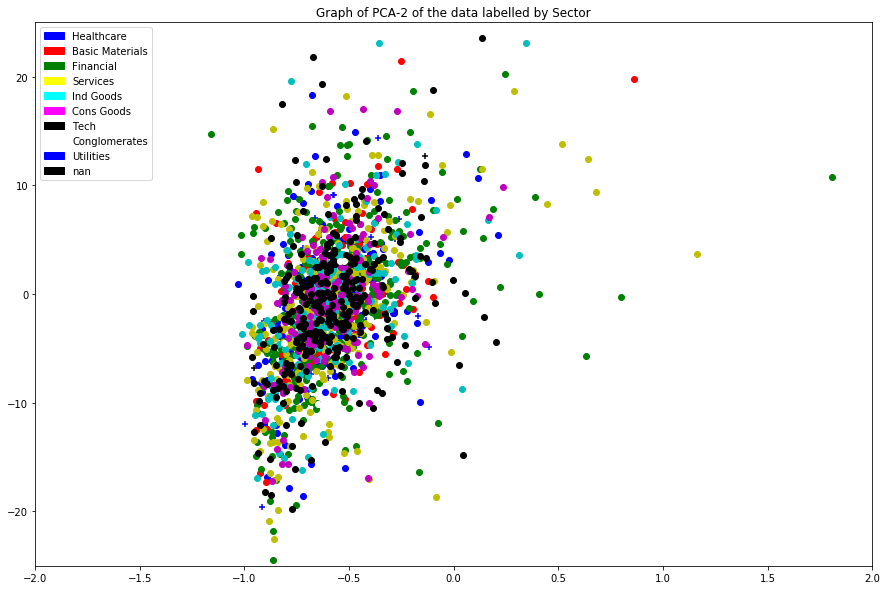

In [193]:
#get all the indices for color coding
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

hinds = [i for i in range(len(sector_names)) if sector_names[i] == 'Healthcare']
bminds = [i for i in range(len(sector_names)) if sector_names[i] == 'Basic Materials']
finds = [i for i in range(len(sector_names)) if sector_names[i] == 'Financial']
sinds = [i for i in range(len(sector_names)) if sector_names[i] == 'Services']
iginds = [i for i in range(len(sector_names)) if sector_names[i] == 'Industrial Goods']
cginds = [i for i in range(len(sector_names)) if sector_names[i] == 'Consumer Goods']
tinds = [i for i in range(len(sector_names)) if sector_names[i] == 'Technology']
cinds = [i for i in range(len(sector_names)) if sector_names[i] == 'Conglomerates']
uinds = [i for i in range(len(sector_names)) if sector_names[i] == 'Utilities']
ninds = [i for i in range(len(sector_names)) if sector_names[i] == 'nan']


Xh = Xpca[hinds,:]
Xb = Xpca[bminds,:]
Xf = Xpca[finds,:]
Xs = Xpca[sinds,:]
Xig = Xpca[iginds,:]
Xcg = Xpca[cginds,:]
Xt = Xpca[tinds,:]
Xc = Xpca[cinds,:]
Xu = Xpca[uinds,:]
Xn = Xpca[ninds,:]

#####

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

plt.plot(Xh[:,0], Xh[:,1], 'bo')
plt.plot(Xb[:,0], Xb[:,1], 'ro')
plt.plot(Xf[:,0], Xf[:,1], 'go')
plt.plot(Xs[:,0], Xs[:,1], 'yo')
plt.plot(Xig[:,0], Xig[:,1], 'co')
plt.plot(Xcg[:,0], Xcg[:,1], 'mo')
plt.plot(Xt[:,0], Xt[:,1], 'ko')
plt.plot(Xc[:,0], Xc[:,1], 'wo')#
plt.scatter(Xu[:,0], Xu[:,1], c='b', marker="+")
plt.scatter(Xn[:,0], Xn[:,1], c='k', marker="+")

blue_patch = mpatches.Patch(color='blue', label='Healthcare')
red_patch = mpatches.Patch(color='red', label='Basic Materials')
green_patch = mpatches.Patch(color='green', label='Financial')
yellow_patch = mpatches.Patch(color='yellow', label='Services')
c_patch = mpatches.Patch(color='cyan', label='Ind Goods')
m_patch = mpatches.Patch(color='magenta', label='Cons Goods')
black_patch = mpatches.Patch(color='black', label='Tech')
w_patch = mpatches.Patch(color='white', label='Conglomerates')
blue2_patch = mpatches.Patch(color='blue', label='Utilities')
black2_patch = mpatches.Patch(color='black', label='nan')
plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch, c_patch, m_patch, black_patch, w_patch,
                   blue2_patch, black2_patch])

#set axis limits
plt.ylim(ymin=-25, ymax=25)
plt.xlim(xmin=-2, xmax=2)

ax.set_title('Graph of PCA-2 of the data labelled by Sector')
plt.show()


[(3, 1), (0, 76), (1, 98), (2, 269)]
[3, 0, 1, 2]


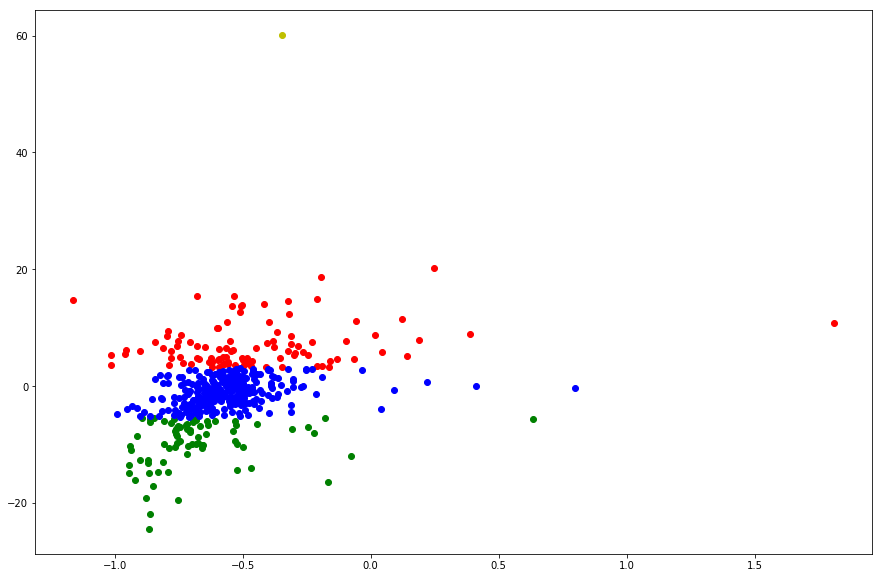

In [207]:
from sklearn.cluster import KMeans

#check the spread of a single sector.

#tech sector.
#plt.plot(Xt[:,0], Xt[:,1], 'ko')

#try clustering within the tech sector stocks (k-means).

kmeans = KMeans(n_clusters=4, n_init=5).fit(Xf)
kmlabels = list(kmeans.labels_)

#count which cluster has the most points
labs = list(set(kmlabels))
labcts = []
for l in labs:
    labcts.append((l, sum([k == l for k in kmlabels]) ))
#now, sort the labels by label counts
labcts = sorted(labcts, key=lambda x:x[1])
graph_labs = [l[0] for l in labcts]  
print(labcts)
print(graph_labs)



#get indices for color coding.
k0inds = [i for i in range(len(kmlabels)) if kmlabels[i] == graph_labs[0]]
k1inds = [i for i in range(len(kmlabels)) if kmlabels[i] == graph_labs[1]]
k2inds = [i for i in range(len(kmlabels)) if kmlabels[i] == graph_labs[2]]
k3inds = [i for i in range(len(kmlabels)) if kmlabels[i] == graph_labs[3]]


Xk0 = Xf[k0inds,:]
Xk1 = Xf[k1inds,:]
Xk2 = Xf[k2inds,:]
Xk3 = Xf[k3inds,:]


### plot
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

plt.plot(Xk0[:,0], Xk0[:,1], 'yo')
plt.plot(Xk1[:,0], Xk1[:,1], 'go')
plt.plot(Xk2[:,0], Xk2[:,1], 'ro')
plt.plot(Xk3[:,0], Xk3[:,1], 'bo')


#q: what is the best way to evaluate these clusters?

plt.show()

-255.13070739153108
-167.08996064756056
-146.80987688395277
-114.3517895342388
-89.63135449663466
-74.1095574169234


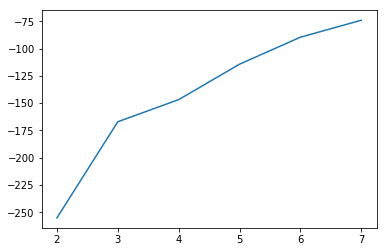

In [139]:
### let's try to measure the goodness of these clusters?

#1. F-test: explained variance vs. unexplained variance.

#2. Elbow method: let's see how the k-means objective increases or decreases based on number of clusters.

#====================================#
# elbow method...
#====================================#

#print scores first.
scores = []

for i in np.arange(2, 8):
    kmeans = KMeans(n_clusters=i, n_init=5).fit(Xf)
    sc = kmeans.score(Xf)
    print(sc)
    scores.append(sc)


#then graph them.
plt.plot(np.arange(2, 8), scores)

## clearly elbow is at 3.


#====================================#
# F test...
#====================================#

#how to calculate this?



In [140]:
#find the stock tickers that are being separated into clusters.

#"colnames" should have the tickers. 
# 1. get all the inds of the sector
# 2. get all the inds of each cluster.

print(len(colnames))
print(colnames[:30])

#list comprehension to get sector names.
#fsector_names = colnames[finds] 
print("----------------------------\nFinance Sector names:")

fsector_names = [colnames[i] for i in finds]
print(fsector_names[:30])

#next, separate into clusters based on the kmeans clustering.

k0tickers = [fsector_names[i] for i in k0inds]
k1tickers = [fsector_names[i] for i in k1inds]
k2tickers = [fsector_names[i] for i in k2inds]
k3tickers = [fsector_names[i] for i in k3inds]


print("============")
print(k0tickers[:20])
print(k1tickers[:20])
print(k2tickers[:20])
print(k3tickers[:20])


1909
['A', 'AA', 'AAME', 'AAN', 'AAON', 'AAP', 'AAPL', 'AAWW', 'ABC', 'ABCB', 'AB', 'ABG', 'ABIO', 'ABM', 'ABMC', 'ABMD', 'ABT', 'ACAD', 'ABR', 'ACC', 'ACFN', 'ACCO', 'ACGL', 'ACHC', 'ACIW', 'ACM', 'ACLS', 'ACN', 'ACNB', 'ACOR']
----------------------------
Finance Sector names:
['AAME', 'ABCB', 'AB', 'ABR', 'ACC', 'ACGL', 'ACNB', 'ADC', 'AEL', 'AFG', 'AFL', 'AGM', 'AGNC', 'AGO', 'AHT', 'AI', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKR', 'ALX', 'AMG', 'AMNB', 'AMP', 'AMRB', 'AMSF', 'AMT', 'AMTD', 'ANAT']
['MERR', 'PNBC']
['AAME', 'ACNB', 'AMRB', 'ARR', 'AUBN', 'AXR', 'BOCH', 'BOTJ', 'BRT', 'CARV', 'CBAN', 'CFBK', 'CFNB', 'CIZN', 'CKX', 'DLR', 'EBMT', 'EHTH', 'FABK', 'FBIZ']
['ABR', 'ACC', 'ACGL', 'ADC', 'AFG', 'AGNC', 'AGO', 'AHT', 'AI', 'AIV', 'AJG', 'AKR', 'AMT', 'ANAT', 'ANH', 'ARI', 'ARL', 'ARE', 'ASRV', 'ATLC']
['ABCB', 'AB', 'AEL', 'AFL', 'AGM', 'AIG', 'AIZ', 'ALX', 'AMG', 'AMNB', 'AMP', 'AMSF', 'AMTD', 'AROW', 'ATLO', 'BAC', 'BANF', 'BANC', 'BDGE', 'BEN']


In [122]:
k3alt = [colnames[i] for i in k3inds]
print(k3alt[:20])

['AAN', 'AAON', 'AAP', 'AAWW', 'ABCB', 'ABIO', 'ABM', 'ABMC', 'ABMD', 'ABT', 'ACAD', 'ABR', 'ACC', 'ACFN', 'ACN', 'ACOR', 'ACTG', 'ACU', 'ACUR', 'ACY']


In [145]:
cluster1 = X[k1tickers]
cluster1_cum = pd.DataFrame()
cluster1 = 1+cluster1
cluster1 = cluster1.cumprod()
cluster1.tail()

,AAME,ACNB,AMRB,ARR,AUBN,AXR,BOCH,BOTJ,BRT,CARV,...,TPL,UBCP,UBFO,UBOH,UNAM,UNTY,VSBN,WAYN,WSBF,WVFC
516,2.205184,1.120808,4.973204,0.720744,1.572745,0.625598,1.950219,0.879747,1.428749,0.118012,...,2.058793,2.153108,0.854188,1.353385,2.161966,1.255380,0.550066,1.247784,0.629831,1.168866
517,2.768345,1.116391,4.783335,0.719139,1.558376,0.633761,1.989105,0.874102,1.426657,0.113538,...,2.043537,2.183125,0.850535,1.362900,2.142215,1.216265,0.545041,1.236385,0.628162,1.125430
518,2.768144,1.123751,4.782987,0.721147,1.558938,0.627582,2.003816,0.875184,1.377469,0.129049,...,2.031092,2.171441,0.854520,1.409324,2.155858,1.235532,0.570956,1.236295,0.631114,1.125348
519,2.695871,1.126339,4.715167,0.720454,1.554379,0.616891,1.961698,0.888693,1.436329,0.121023,...,2.124352,2.257031,0.850295,1.384591,2.208312,1.211355,0.568133,1.193631,0.627014,1.119784
520,2.624836,1.141877,4.721273,0.722850,1.570986,0.632292,1.929500,0.912362,1.438805,0.121513,...,2.150847,2.281825,0.851057,1.383937,2.208237,1.219382,0.569872,1.193590,0.628303,1.120441


In [149]:
cluster1_cumprod = cluster1+1
cluster1_cumprod.tail()


,AAME,ACNB,AMRB,ARR,AUBN,AXR,BOCH,BOTJ,BRT,CARV,...,TPL,UBCP,UBFO,UBOH,UNAM,UNTY,VSBN,WAYN,WSBF,WVFC
516,1.205184,0.120808,3.973204,-0.279256,0.572745,-0.374402,0.950219,-0.120253,0.428749,-0.881988,...,1.058793,1.153108,-0.145812,0.353385,1.161966,0.255380,-0.449934,0.247784,-0.370169,0.168866
517,1.768345,0.116391,3.783335,-0.280861,0.558376,-0.366239,0.989105,-0.125898,0.426657,-0.886462,...,1.043537,1.183125,-0.149465,0.362900,1.142215,0.216265,-0.454959,0.236385,-0.371838,0.125430
518,1.768144,0.123751,3.782987,-0.278853,0.558938,-0.372418,1.003816,-0.124816,0.377469,-0.870951,...,1.031092,1.171441,-0.145480,0.409324,1.155858,0.235532,-0.429044,0.236295,-0.368886,0.125348
519,1.695871,0.126339,3.715167,-0.279546,0.554379,-0.383109,0.961698,-0.111307,0.436329,-0.878977,...,1.124352,1.257031,-0.149705,0.384591,1.208312,0.211355,-0.431867,0.193631,-0.372986,0.119784
520,1.624836,0.141877,3.721273,-0.277150,0.570986,-0.367708,0.929500,-0.087638,0.438805,-0.878487,...,1.150847,1.281825,-0.148943,0.383937,1.208237,0.219382,-0.430128,0.193590,-0.371697,0.120441


In [196]:
pca.get_covariance()

array([[ 0.18613791,  0.00865526,  0.00829409, ..., -0.01331135,
        -0.01333906, -0.01335557],
       [ 0.00865526,  0.19261441,  0.01150553, ...,  0.00543286,
         0.00539446,  0.00536934],
       [ 0.00829409,  0.01150553,  0.19103533, ..., -0.02056577,
        -0.02060286, -0.0206247 ],
       ...,
       [-0.01331135,  0.00543286, -0.02056577, ...,  1.16922099,
         0.98935562,  0.98930795],
       [-0.01333906,  0.00539446, -0.02060286, ...,  0.98935562,
         1.16936188,  0.98937853],
       [-0.01335557,  0.00536934, -0.0206247 , ...,  0.98930795,
         0.98937853,  1.16926674]])

In [199]:
import pandas as pd
scx_df = pd.DataFrame(scaled_x)
scx_df.corr()

,0,1,2,3,4,5,6,7,8,9,...,994,995,996,997,998,999,1000,1001,1002,1003
0,1.000000,0.598421,0.511103,0.489811,0.457356,0.407583,0.415016,0.330743,0.337316,0.196642,...,-0.015537,-0.015534,-0.015580,-0.015375,-0.015683,-0.015230,-0.015486,-0.015186,-0.015220,-0.015284
1,0.598421,1.000000,0.799067,0.763074,0.716149,0.669165,0.661388,0.584575,0.566973,0.401995,...,0.004782,0.004819,0.004831,0.005226,0.004604,0.005533,0.004962,0.005330,0.005316,0.005249
2,0.511103,0.799067,1.000000,0.874153,0.804845,0.740378,0.707714,0.640276,0.626407,0.455732,...,-0.025328,-0.025369,-0.025371,-0.024884,-0.025591,-0.024561,-0.025353,-0.025973,-0.025767,-0.025731
3,0.489811,0.763074,0.874153,1.000000,0.922450,0.847365,0.801220,0.733555,0.739223,0.538896,...,-0.016045,-0.016060,-0.016029,-0.015567,-0.016262,-0.015330,-0.016066,-0.016809,-0.016579,-0.016513
4,0.457356,0.716149,0.804845,0.922450,1.000000,0.891018,0.849115,0.791662,0.790991,0.588844,...,-0.014865,-0.014901,-0.014841,-0.014430,-0.015043,-0.014267,-0.014970,-0.016060,-0.015773,-0.015678
5,0.407583,0.669165,0.740378,0.847365,0.891018,1.000000,0.921159,0.873263,0.854802,0.744924,...,-0.018596,-0.018621,-0.018573,-0.018083,-0.018828,-0.017838,-0.018692,-0.019717,-0.019425,-0.019328
6,0.415016,0.661388,0.707714,0.801220,0.849115,0.921159,1.000000,0.918997,0.883222,0.741027,...,-0.012334,-0.012332,-0.012321,-0.011856,-0.012551,-0.011564,-0.012272,-0.012183,-0.012158,-0.012174
7,0.330743,0.584575,0.640276,0.733555,0.791662,0.873263,0.918997,1.000000,0.944557,0.856052,...,-0.012432,-0.012406,-0.012385,-0.011864,-0.012657,-0.011515,-0.012341,-0.012208,-0.012194,-0.012205
8,0.337316,0.566973,0.626407,0.739223,0.790991,0.854802,0.883222,0.944557,1.000000,0.849291,...,-0.025956,-0.025990,-0.026020,-0.025439,-0.026245,-0.025139,-0.026054,-0.026652,-0.026460,-0.026410
9,0.196642,0.401995,0.455732,0.538896,0.588844,0.744924,0.741027,0.856052,0.849291,1.000000,...,-0.013706,-0.013714,-0.013741,-0.013290,-0.013910,-0.012992,-0.013716,-0.013622,-0.013605,-0.013637


In [200]:
cov = pca.get_covariance()
precision_1 = np.linalg.inv(cov)
print(precision_1)

[[ 5.55735608e+00 -2.63327452e-04 -2.43888514e-04 ...  7.78590435e-05
   7.86733118e-05  7.91878666e-05]
 [-2.63327452e-04  5.55715498e+00 -3.50226280e-04 ... -1.01849677e-04
  -1.00680753e-04 -9.99220502e-05]
 [-2.43888514e-04 -3.50226280e-04  5.55721412e+00 ...  1.28359393e-04
   1.29444554e-04  1.30127986e-04]
 ...
 [ 7.78590435e-05 -1.01849677e-04  1.28359393e-04 ...  5.54894882e+00
  -8.59075992e-03 -8.59023856e-03]
 [ 7.86733118e-05 -1.00680753e-04  1.29444554e-04 ... -8.59075992e-03
   5.54894792e+00 -8.59068795e-03]
 [ 7.91878666e-05 -9.99220502e-05  1.30127986e-04 ... -8.59023856e-03
  -8.59068795e-03  5.54894896e+00]]


In [203]:
corr = scx_df.corr()
precision_2 = np.linalg.inv(corr)
print(precision_2)

[[ 9.93271918e+00 -3.73192973e+00 -1.83423982e+00 ...  1.74813079e+02
  -3.09306226e+02  1.28797836e+02]
 [-3.73192920e+00  1.38356383e+01 -8.74455186e+00 ...  8.13325635e+02
  -2.14258868e+03  1.30278456e+03]
 [-1.83424022e+00 -8.74455154e+00  2.41618514e+01 ... -4.08462888e+02
   1.16817628e+03 -9.74828772e+02]
 ...
 [ 1.74813108e+02  8.13326699e+02 -4.08462299e+02 ...  3.64961014e+07
  -1.51799497e+07 -1.23712189e+06]
 [-3.09306133e+02 -2.14258935e+03  1.16817555e+03 ... -1.51799524e+07
   2.96572129e+07 -1.46463286e+07]
 [ 1.28798059e+02  1.30278450e+03 -9.74827868e+02 ... -1.23712093e+06
  -1.46463311e+07  1.69187192e+07]]
